## Iris  Classification



Import Libraries

In [823]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier ,plot_tree
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix,ConfusionMatrixDisplay


Data Loading

In [824]:
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y


In [825]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [826]:
df.shape

(150, 5)

In [827]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [828]:
df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [829]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [830]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [831]:
df.describe(include='all').round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20,1.00
std,0.83,0.44,1.77,0.76,0.82
min,4.30,2.00,1.00,0.10,0.00
25%,5.10,2.80,1.60,0.30,0.00
50%,5.80,3.00,4.35,1.30,1.00
75%,6.40,3.30,5.10,1.80,2.00
max,7.90,4.40,6.90,2.50,2.00


Data Visualization

Text(0.5, 1.0, 'Petal Width Distribution')

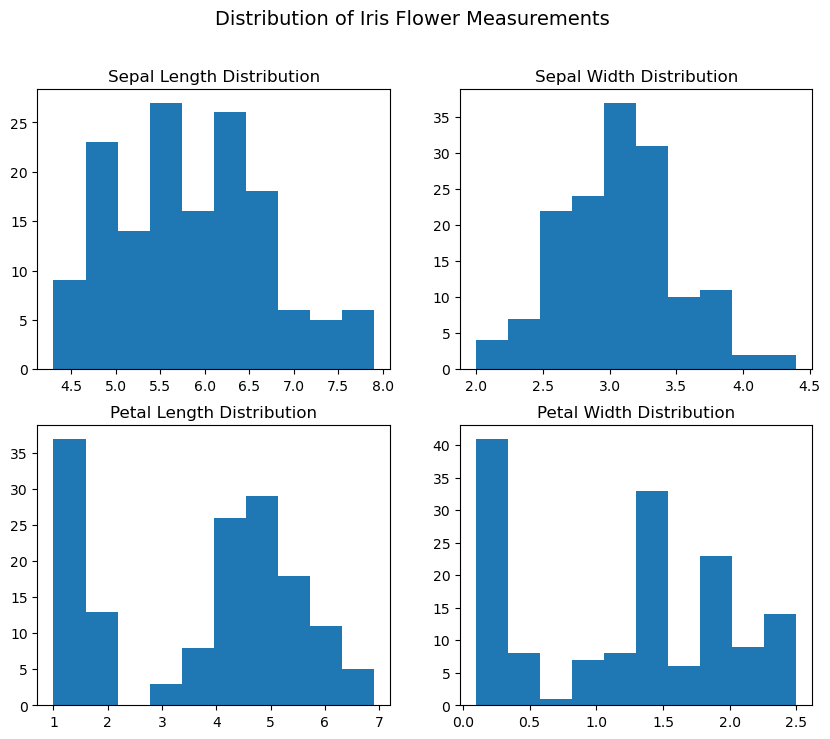

In [832]:
plt.figure(figsize=(10,8))
plt.suptitle('Distribution of Iris Flower Measurements' , fontsize=14)
plt.subplot(2,2,1)
plt.hist(df['sepal length (cm)'])
plt.title('Sepal Length Distribution')

plt.subplot(2,2,2)
plt.hist(df['sepal width (cm)'])
plt.title('Sepal Width Distribution')

plt.subplot(2,2,3)
plt.hist(df['petal length (cm)'])
plt.title('Petal Length Distribution')

plt.subplot(2,2,4)
plt.hist(df['petal width (cm)'])
plt.title('Petal Width Distribution')

c:\Users\garla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\garla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\garla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\garla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

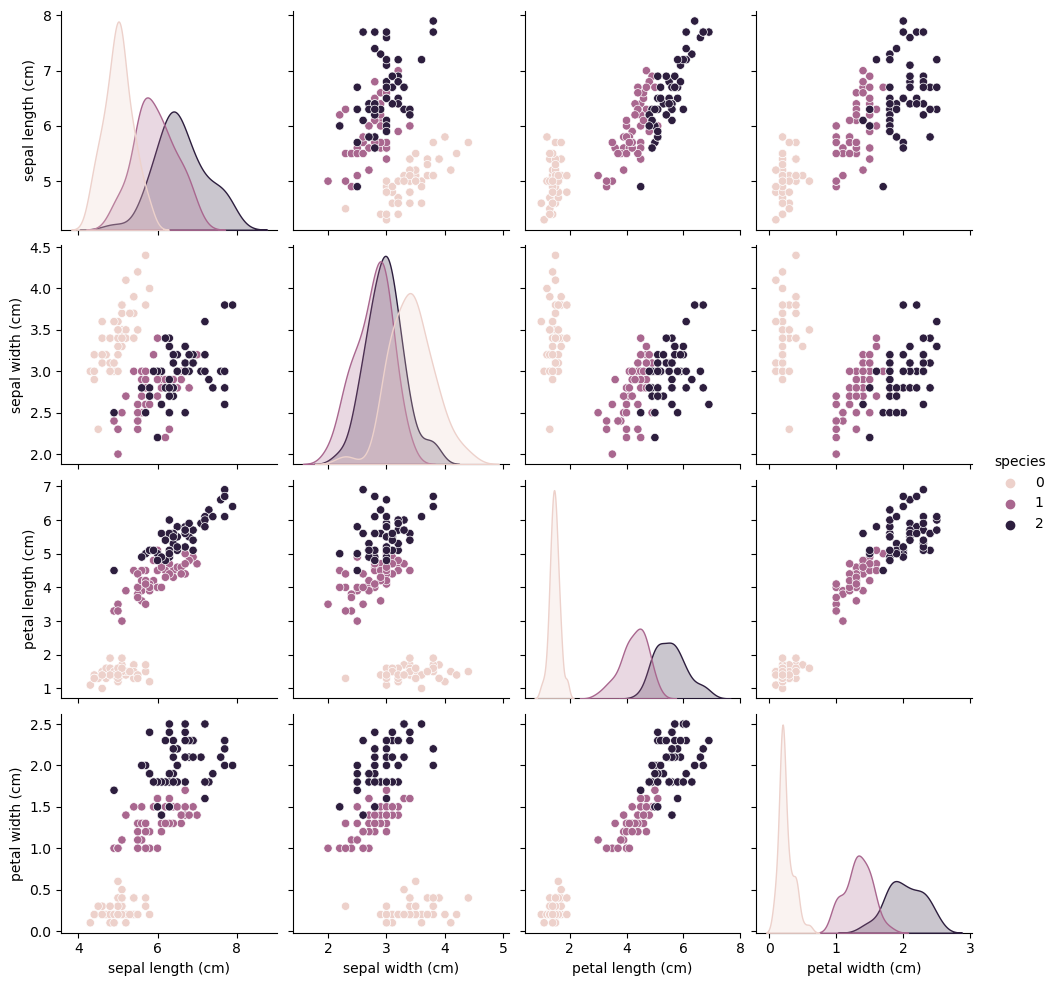

In [833]:
sns.pairplot(df,hue='species')

In [834]:
corr_matrix=df.corr()
print(f"Coorelation Matrix:\n\n {corr_matrix}")

Coorelation Matrix:

                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
species                     0.782561         -0.426658           0.949035   

                   petal width (cm)   species  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
species                    0.956547  1.000000  


Text(0.5, 1.0, 'Corelation Matrix')

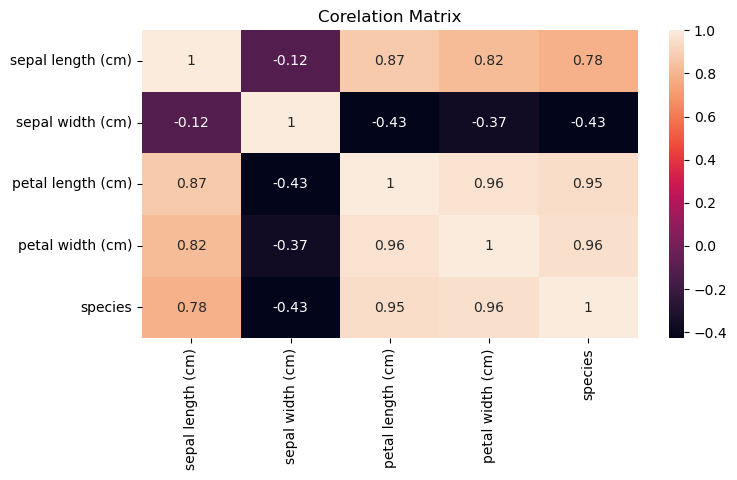

In [835]:
plt.figure(figsize=(8,4))
sns.heatmap(corr_matrix,annot=True)
plt.title("Corelation Matrix")

**Categorical Encoding**

In [836]:
df['species']=LabelEncoder().fit_transform(df['species'])

In [837]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Data Scaling

In [838]:

X=df.drop(columns=['species'])
y=df['species']

Data Splitting

In [839]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

Model Training

In [840]:
model_logistic=LogisticRegression()

In [841]:
model_logistic.fit(X_train,y_train)

LogisticRegression()

In [842]:
y_preds_logistic=model_logistic.predict(X_test)

In [843]:
Accuracy_LogisticRegression = model_logistic.score(X_test, y_test)
print(f"Model Accuracy: {Accuracy_LogisticRegression:.2f}")


Model Accuracy: 0.91


In [844]:
print('Classification Report : ')
print(classification_report(y_test,y_preds_logistic,target_names=iris.target_names))

Classification Report : 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.94      0.83      0.88        18
   virginica       0.83      0.94      0.88        16

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.92      0.91      0.91        45



In [845]:
LogisticRegression_cm = confusion_matrix(y_test, y_preds_logistic)
LogisticRegression_cm

array([[11,  0,  0],
       [ 0, 15,  3],
       [ 0,  1, 15]], dtype=int64)

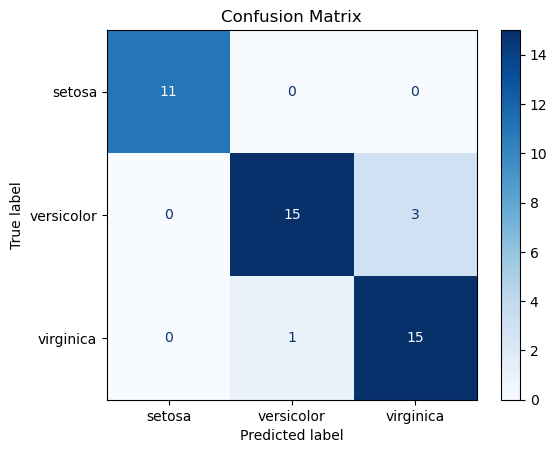

In [846]:
disp = ConfusionMatrixDisplay(confusion_matrix=LogisticRegression_cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### K Nearest Neighbors

In [847]:
knn_model=KNeighborsClassifier(n_neighbors=3)

In [848]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [849]:
y_preds_knn=knn_model.predict(X_test)

In [850]:
Accuracy_KNN=accuracy_score(y_test,y_preds_knn)
print("Accuracy",Accuracy_KNN)

Accuracy 0.9111111111111111


In [851]:
KNN_cm=confusion_matrix(y_test, y_preds_knn)
print("Confusion Matrix:\n", KNN_cm)


Confusion Matrix:
 [[11  0  0]
 [ 0 16  2]
 [ 0  2 14]]


In [852]:
print("Classification Report:\n", classification_report(y_test, y_preds_knn))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.89      0.89      0.89        18
           2       0.88      0.88      0.88        16

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.91      0.91      0.91        45



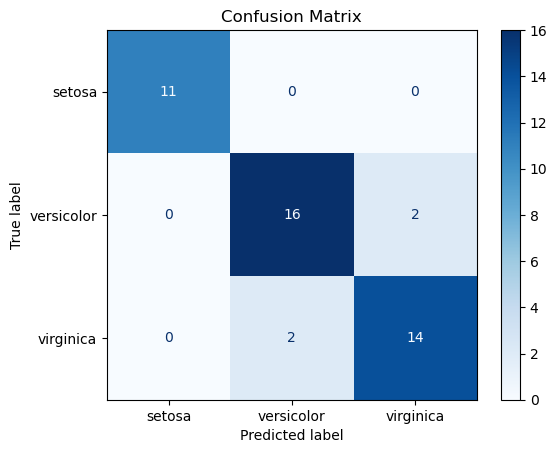

In [853]:
disp = ConfusionMatrixDisplay(confusion_matrix=KNN_cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### Decission Tree

In [854]:
model_decissionTress=DecisionTreeClassifier(criterion='entropy',random_state=42)

In [855]:
model_decissionTress.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [856]:
y_preds_decissionTree=model_decissionTress.predict(X_test)
y_preds_decissionTree

array([2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2, 0, 0, 1, 2, 1, 1, 1, 2, 2, 0,
       2, 0, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       0], dtype=int64)

In [857]:
Accuracy_DecisionTree=accuracy_score(y_test,y_preds_decissionTree)
print("Accuracy : ",Accuracy_DecisionTree)

Accuracy :  0.8888888888888888


In [858]:
DT_cm=confusion_matrix(y_test, y_preds_decissionTree)
print("Confusion Matrix :\n ",DT_cm)

Confusion Matrix :
  [[11  0  0]
 [ 0 13  5]
 [ 0  0 16]]


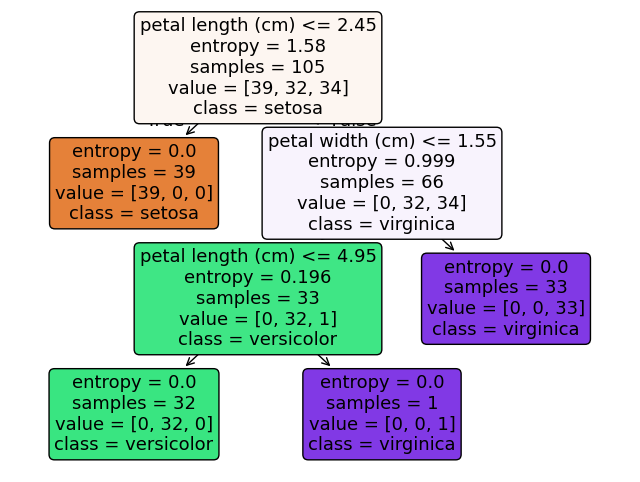

In [859]:
plt.figure(figsize=(8,6))
plot_tree(model_decissionTress, filled=True, feature_names=iris.feature_names, class_names=iris.target_names,rounded=True)
plt.show()


### Support Vector Classifier

In [860]:
model_svm=SVC(kernel='linear')
model_svm.fit(X_train,y_train)

SVC(kernel='linear')

In [861]:
y_preds_svm=model_svm.predict(X_test)

In [862]:
Accuracy_SVM=accuracy_score(y_test,y_preds_svm)

In [863]:
SVC_cm=confusion_matrix(y_test,y_preds_svm)
print("Confusion matrix :\n",SVC_cm)

Confusion matrix :
 [[11  0  0]
 [ 0 16  2]
 [ 0  0 16]]


In [864]:
print("\nClassification Report:\n", classification_report(y_test, y_preds_svm))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.89      0.94        18
           2       0.89      1.00      0.94        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [868]:
models = {
    "Logistic Regression": model_logistic,
    "K-Nearest Neighbors": knn_model,
    "Decision Tree": model_decissionTress,
    "Support Vector Machine": model_svm
}

accuracies = {'Logistic Regression' : Accuracy_LogisticRegression,
            'K-Nearest Neighbors' : Accuracy_LogisticRegression,
            'Decision Tree' : Accuracy_DecisionTree,
            'Support Vector Machine' : Accuracy_SVM}

best_model = max(accuracies, key=accuracies.get)
print(f"\nBest Model : {best_model} with Accuracy: {accuracies[best_model]:.4f}")


Best Model : Support Vector Machine with Accuracy: 0.9556
